<a href="https://colab.research.google.com/github/RichardKameri/Ml1/blob/main/Chip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset
df = pd.read_csv('/content/chip_dataset.csv')

In [3]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [4]:
# shape of the data
df.shape

(4945, 13)

In [5]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [6]:
# change Release date column from object to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

<ipython-input-6-d53870ea4619>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


In [7]:
# iformation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4746 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4508 non-null   object        
 5   Die Size (mm^2)        4593 non-null   object        
 6   Transistors (million)  4390 non-null   object        
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP16 GFLOPS            800 non-null    float64       
 11  FP32 GFLOPS            1685 non-null   float64       
 12  FP64 GFLOPS            1278 non-null   float64       
dtypes: 

In [8]:
# remove the last column
df = df.iloc[:, :-1]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4746 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4508 non-null   object        
 5   Die Size (mm^2)        4593 non-null   object        
 6   Transistors (million)  4390 non-null   object        
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP16 GFLOPS            800 non-null    float64       
 11  FP32 GFLOPS            1685 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 463.

<Axes: >

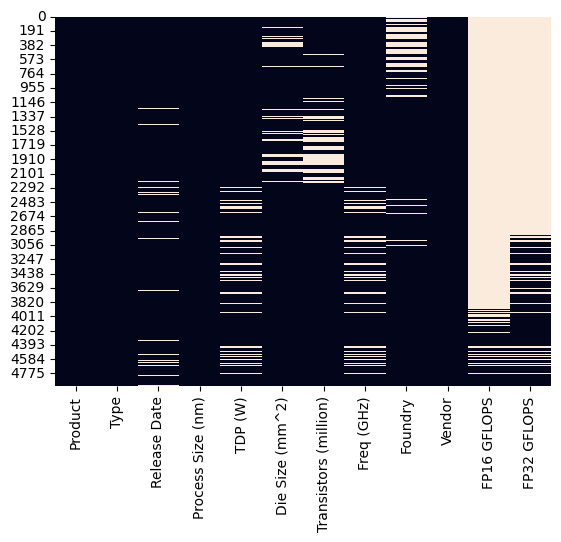

In [10]:
# visualize missing values
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# check percentage of missing values
df.isnull().sum() / len(df) * 100

,0
Product,0.000000
Type,0.000000
Release Date,4.024267
Process Size (nm),0.000000
TDP (W),8.837209
Die Size (mm^2),7.118301
Transistors (million),11.223458
Freq (GHz),8.837209
Foundry,12.436805
Vendor,0.000000


In [12]:
# Handle missing values (example: fill with mode for categorical and mean for numerical))
for column in df.select_dtypes(include=['object']):
  df[column].fillna(df[column].mode()[0], inplace=True)

for column in df.select_dtypes(include=['float64', 'int64']):
  df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-12-7fe2abca3f81>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-12-7fe2abca3f81>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

<Axes: >

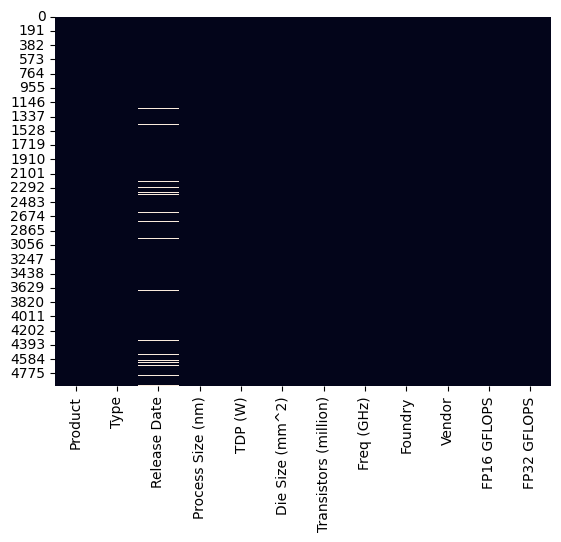

In [13]:
# verify missing values after handling
sns.heatmap(df.isnull(), cbar=False)

In [14]:
# print missing values after handling
df.isnull().sum()

,0
Product,0
Type,0
Release Date,199
Process Size (nm),0
TDP (W),0
Die Size (mm^2),0
Transistors (million),0
Freq (GHz),0
Foundry,0
Vendor,0


  EDA

In [15]:
# exploratory data analysis
df.describe()

,Release Date,Freq (GHz),FP16 GFLOPS,FP32 GFLOPS
count,4746,4945.00000,4945.000000,4945.000000
mean,2012-09-04 02:02:16.536030464,1615.43079,19033.061063,5403.009359
min,1999-03-15 00:00:00,100.00000,10.020000,12.800000
25%,2007-04-01 00:00:00,700.00000,19033.061063,4825.000000
50%,2012-09-04 12:00:00,1600.00000,19033.061063,5403.009359
75%,2018-04-11 00:00:00,2400.00000,19033.061063,5403.009359
max,2024-01-08 00:00:00,4700.00000,653700.000000,93240.000000
std,NaN,1035.59691,18036.203789,6707.042222


In [16]:
# shape of our data
df.shape

(4945, 12)

In [17]:
# data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4746 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4945 non-null   object        
 5   Die Size (mm^2)        4945 non-null   object        
 6   Transistors (million)  4945 non-null   object        
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP16 GFLOPS            4945 non-null   float64       
 11  FP32 GFLOPS            4945 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 463.

In [18]:
df.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS'],
      dtype='object')

In [22]:
# drop columns
df.drop(['Process Size (nm)', 'Release Date'], axis=1, inplace=True)

In [23]:
# drop the last two columns
df.drop(df.columns[-2:], axis=1, inplace=True)

In [25]:
# drop the 3rd column
df.drop(df.columns[2], axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Die Size (mm^2)        4945 non-null   object 
 3   Transistors (million)  4945 non-null   object 
 4   Freq (GHz)             4945 non-null   float64
 5   Foundry                4945 non-null   object 
 6   Vendor                 4945 non-null   object 
dtypes: float64(1), object(6)
memory usage: 270.6+ KB


In [27]:
# show the contents of the dataset
df.head()

,Product,Type,Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,120,37,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,120,37,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,120,37,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,120,37,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,120,37,1200.0,TSMC,AMD


In [28]:
# check for missing values
df.isnull().sum()

,0
Product,0
Type,0
Die Size (mm^2),0
Transistors (million),0
Freq (GHz),0
Foundry,0
Vendor,0


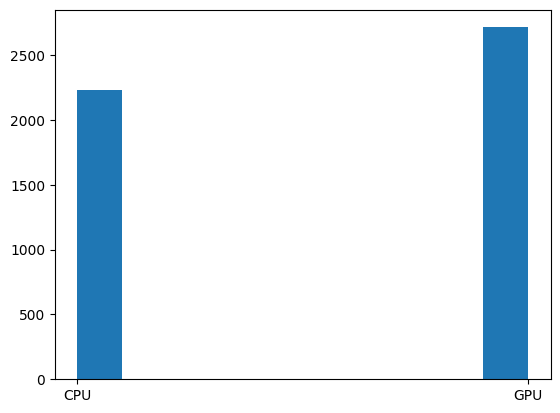

In [19]:
# histogram for Type
plt.hist(df['Type'])
plt.show()

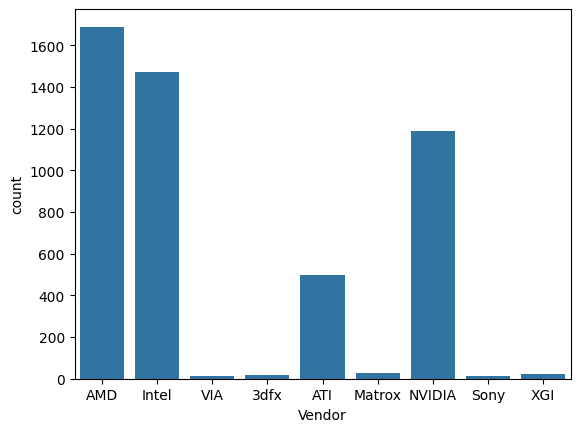

In [36]:
# barplot for vendor
sns.countplot(x='Vendor', data=df)
plt.show()

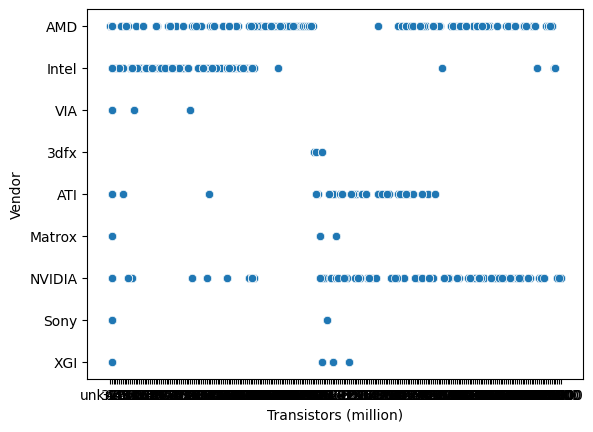

In [44]:
# scatterplot for transistors
sns.scatterplot(x='Transistors (million)', y='Vendor', data=df)
plt.show()
